In [34]:
!pip install matplotlib numpy opencv-python ipywidgets pillow

FileUpload(value=(), accept='image/*', description='Upload')

Button(description='Process Image', style=ButtonStyle())

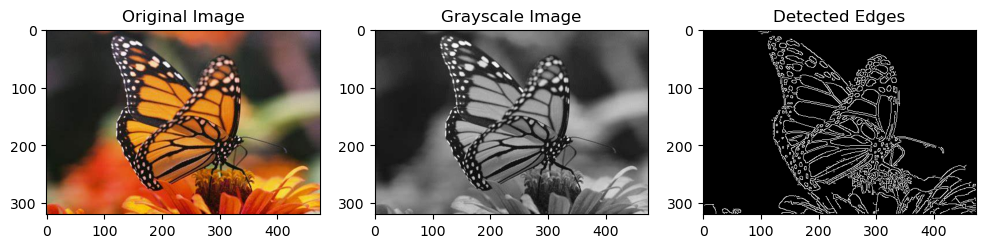

In [1]:
# Importing necessary libraries
from matplotlib import pyplot as plt
from matplotlib import pyplot as plt
import numpy as np
import math
import cv2
import ipywidgets as widgets
from IPython.display import display
from io import BytesIO
from PIL import Image

# Hough Line Transform Function
def hough_line(edge):
    theta = np.arange(0, 180, 1)
    
    # Calculating 'cos' and 'sin' values before to improve run time
    cos = np.cos(np.deg2rad(theta))
    sin = np.sin(np.deg2rad(theta))

    # Generating an accumulator matrix for storing the values
    rho_range = round(math.sqrt(edge.shape[0]**2 + edge.shape[1]**2))
    accumulator = np.zeros((2 * rho_range, len(theta)), dtype=np.uint8)

    # Thresholding to get edges pixel location (x,y)
    edge_pixels = np.where(edge == 255)
    coordinates = list(zip(edge_pixels[0], edge_pixels[1]))

    # Calculating RHO value for each edge location (x,y) with the theta range
    for p in range(len(coordinates)):
        for t in range(len(theta)):
            rho = int(round(coordinates[p][1] * cos[t] + coordinates[p][0] * sin[t]))
            accumulator[rho, t] += 1  # Can be adjusted for more/less accuracy

    return accumulator

# Function to handle image processing
def process_image(image_content):
    nparr = np.frombuffer(image_content, np.uint8)
    image = cv2.imdecode(nparr, cv2.IMREAD_COLOR)
    original_image = image.copy()
    grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(grayscale, 50, 150)

    # Calling Hough line transform function
    accumulator = hough_line(edges)

    # Drawing the lines
    edge_pixels = np.where(accumulator > 110)
    coordinates = list(zip(edge_pixels[0], edge_pixels[1]))

    # Using the line equation to draw detected line
    scaling_factor = 1000
    for i in range(len(coordinates)):
        a = np.cos(np.deg2rad(coordinates[i][1]))
        b = np.sin(np.deg2rad(coordinates[i][1]))
        x0 = a * coordinates[i][0]
        y0 = b * coordinates[i][0]
        x1 = int(x0 + scaling_factor * (-b))
        y1 = int(y0 + scaling_factor * (a))
        x2 = int(x0 - scaling_factor * (-b))
        y2 = int(y0 - scaling_factor * (a))

        cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 1)

    plt.figure(figsize=(12, 6))

    # Showing the original image
    plt.subplot(131), plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    
    # Showing the grayscale image
    plt.subplot(132), plt.imshow(grayscale, cmap='gray')
    plt.title('Grayscale Image')

    # Showing the detected edges image
    plt.subplot(133), plt.imshow(edges, cmap='gray')
    plt.title('Detected Edges')

    plt.show()

# Creating file upload widget for image
image_upload_widget = widgets.FileUpload(accept='image/*', multiple=False)

# Creating button to trigger image processing
process_button = widgets.Button(description="Process Image")

# Function to handle button click event
def on_button_click(b):
    uploaded_image = image_upload_widget.value
    image_content = uploaded_image[-1]['content']
    process_image(image_content)

# Assign on_button_click function to process_button click event
process_button.on_click(on_button_click)

# Display widgets
display(image_upload_widget)
display(process_button)